In [1]:
import sys
sys.path.insert(0, '../Aaron/Filters')

import lee_enhanced

In [2]:
import numpy as np
import pandas as pd

In [3]:
train = pd.read_json("../train.json")
test = pd.read_json("../test.json")

In [4]:
x_band1 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_1"]])
x_band2 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_2"]])
X_train = np.concatenate([x_band1[:, :, :, np.newaxis]
                          , x_band2[:, :, :, np.newaxis]
                         , ((x_band1+x_band1)/2)[:, :, :, np.newaxis]], axis=-1)
x_band1.shape
x_band1lee = lee_enhanced.lee_enhanced_filter_df(x_band1)

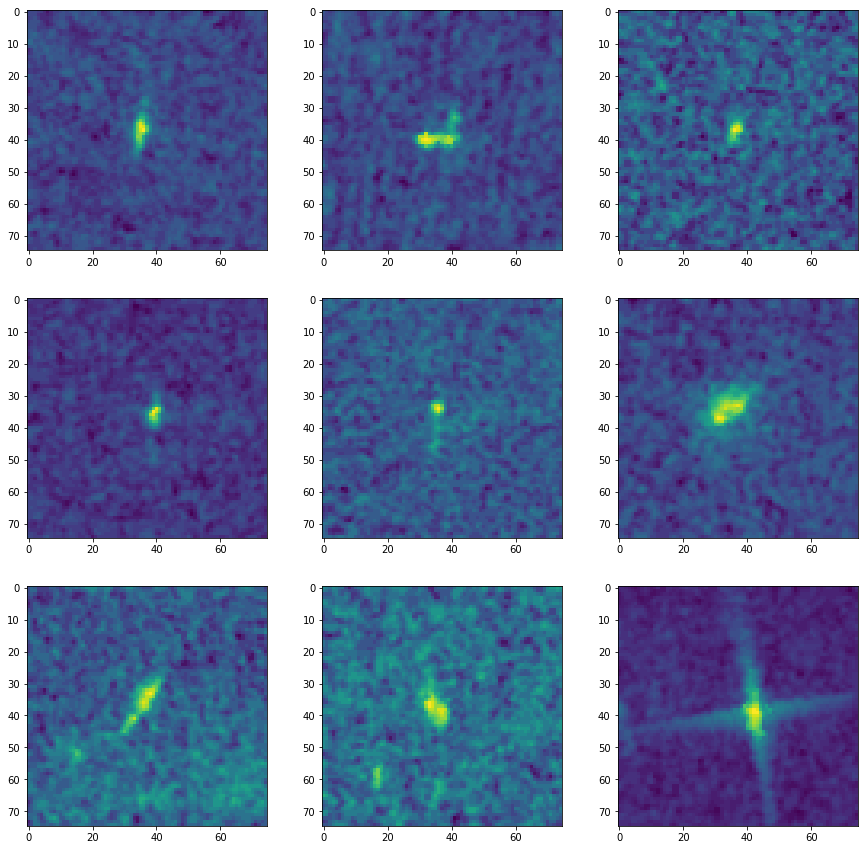

Filtered through lee


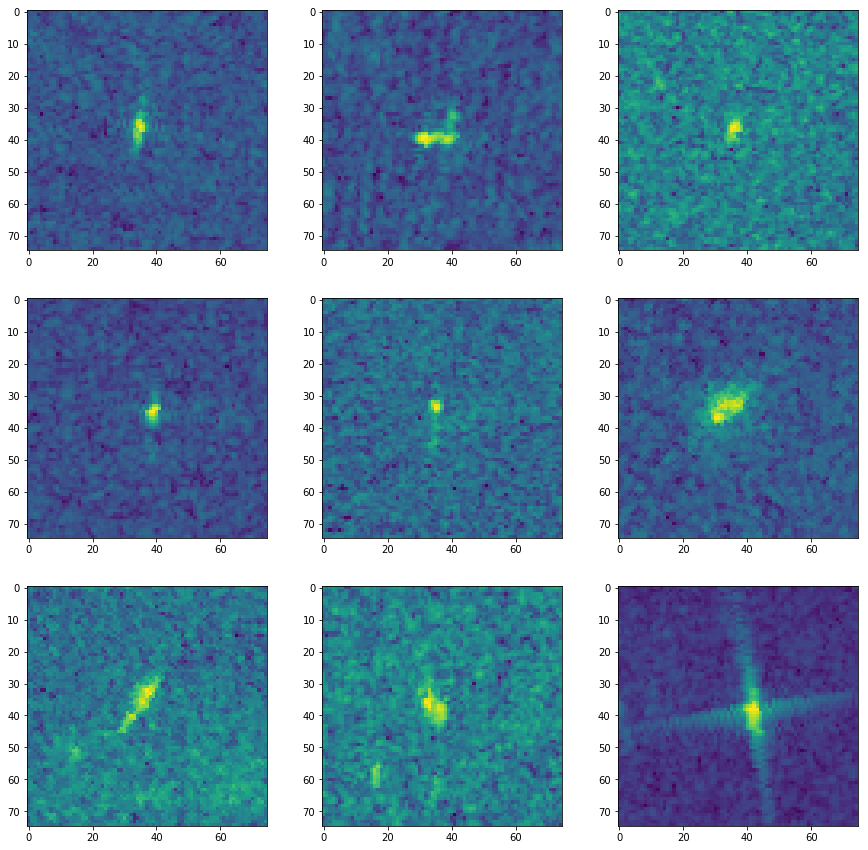

Unfiltered


In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(1,figsize=(15,15))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    ax.imshow(x_band1lee[i])
plt.show()
print('Filtered through lee')
fig = plt.figure(1,figsize=(15,15))
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    ax.imshow(x_band1[i])
plt.show()
print('Unfiltered')